In [2]:
import pandas as pd
import matplotlib.pyplot as plt

1. Wczytaj pliki Plant_1_Generation_Data.csv i Plant_2_Generation_Data.csv (źródło: Kaggle) i utwórz z nich jeden DataFrame

In [3]:
plant_1 = pd.read_csv("Plant_1_Generation_Data.csv")
plant_2 = pd.read_csv("Plant_2_Generation_Data.csv")
plant = pd.concat([plant_1, plant_2])
display(plant.tail(11))

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
67687,2020-06-17 23:45:00,4136001.0,Quc1TzYxW2pYoWX,0.0,0.0,3702.0,3.296459e+08
67688,2020-06-17 23:45:00,4136001.0,V94E5Ben1TlhnDV,0.0,0.0,4324.0,1.412293e+09
67689,2020-06-17 23:45:00,4136001.0,WcxssY2VbP4hApt,0.0,0.0,4331.0,1.819119e+08
67690,2020-06-17 23:45:00,4136001.0,mqwcsP2rE7J0TFp,0.0,0.0,4238.0,5.938150e+08
67691,2020-06-17 23:45:00,4136001.0,oZ35aAeoifZaQzV,0.0,0.0,4467.0,1.660189e+09
67692,2020-06-17 23:45:00,4136001.0,oZZkBaNadn6DNKz,0.0,0.0,4389.0,1.708288e+09
67693,2020-06-17 23:45:00,4136001.0,q49J1IKaHRwDQnt,0.0,0.0,4157.0,5.207580e+05
67694,2020-06-17 23:45:00,4136001.0,rrq4fwE8jgrTyWY,0.0,0.0,3931.0,1.211314e+08
67695,2020-06-17 23:45:00,4136001.0,vOuJvMaM2sgwLmb,0.0,0.0,4322.0,2.427691e+06
67696,2020-06-17 23:45:00,4136001.0,xMbIugepa2P7lBB,0.0,0.0,4218.0,1.068964e+08


2. Odfiltruj wiersze z brakującymi danymi

In [156]:
plant.dropna(inplace=True)
display(plant.head(11))

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001.0,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,4135001.0,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,4135001.0,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,15-05-2020 00:00,4135001.0,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,15-05-2020 00:00,4135001.0,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0
5,15-05-2020 00:00,4135001.0,VHMLBKoKgIrUVDU,0.0,0.0,0.0,7206408.0
6,15-05-2020 00:00,4135001.0,WRmjgnKYAwPKWDb,0.0,0.0,0.0,7028673.0
7,15-05-2020 00:00,4135001.0,ZnxXDlPa8U1GXgE,0.0,0.0,0.0,6522172.0
8,15-05-2020 00:00,4135001.0,ZoEaEvLYb1n2sOq,0.0,0.0,0.0,7098099.0
10,15-05-2020 00:00,4135001.0,bvBOhCH3iADSZry,0.0,0.0,0.0,6316803.0


3. Wykonaj wykres AC_POWER dla wybranego generatora w wybranym tygodniu

I choose the first week for gererator in data. The period is specified between 18 to 24

In [8]:
plant["DATE_TIME"] = pd.to_datetime(plant["DATE_TIME"])
week_plant_1 = (plant["DATE_TIME"] >= "2020-05-16") & (plant["DATE_TIME"] <= "2020-05-24") & (plant["PLANT_ID"] == 4135001)
week_plant_2 = (plant["DATE_TIME"] >= "2020-05-16") & (plant["DATE_TIME"] <= "2020-05-24") & (plant["PLANT_ID"] == 4136001)
period_plant_1 = plant.loc[week_plant_1]
period_plant_2 = plant.loc[week_plant_2]
display(period_plant_1)
display(period_plant_2)

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
1954,2020-05-16 02:00:00,4135001.0,1BY6WEcLGh8j5v7,0.0,0.0,0.000000,6265313.0
1955,2020-05-16 02:00:00,4135001.0,3PZuoBAID5Wc2HD,0.0,0.0,0.000000,6994033.0
1956,2020-05-16 02:00:00,4135001.0,7JYdWkrLSPkdwr4,0.0,0.0,0.000000,7609076.0
1957,2020-05-16 02:00:00,4135001.0,McdE0feGgRqW7Ca,0.0,0.0,0.000000,7165435.0
1958,2020-05-16 02:00:00,4135001.0,VHMLBKoKgIrUVDU,0.0,0.0,0.000000,7212666.0
...,...,...,...,...,...,...,...
17145,2020-05-24 00:00:00,4135001.0,uHbuxQJl8lW7ozc,0.0,0.0,0.000000,7103746.0
17146,2020-05-24 00:00:00,4135001.0,wCURE6d3bPkepu2,0.0,0.0,0.000000,6847830.0
17147,2020-05-24 00:00:00,4135001.0,z9Y9gH1T5YWrNuG,0.0,0.0,2135.750000,7072762.0
17148,2020-05-24 00:00:00,4135001.0,zBIq5rxdHJRwDNY,0.0,0.0,1239.142857,6404481.0


,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
2090,2020-05-16,4136001.0,4UPUqMRk7TRMgml,0.0,0.0,4201.000000,2.433212e+06
2091,2020-05-16,4136001.0,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215282e+09
2092,2020-05-16,4136001.0,9kRcWv60rDACzjR,0.0,0.0,3082.000000,2.247729e+09
2093,2020-05-16,4136001.0,Et9kgGMDl729KT4,0.0,0.0,276.933333,1.708404e+06
2094,2020-05-16,4136001.0,IQ2d7wF4YD8zU1Q,0.0,0.0,3221.000000,1.995119e+07
...,...,...,...,...,...,...,...
17153,2020-05-24,4136001.0,oZZkBaNadn6DNKz,0.0,0.0,0.000000,1.708138e+09
17154,2020-05-24,4136001.0,q49J1IKaHRwDQnt,0.0,0.0,3254.000000,3.867580e+05
17155,2020-05-24,4136001.0,rrq4fwE8jgrTyWY,0.0,0.0,213.000000,1.210135e+08
17156,2020-05-24,4136001.0,vOuJvMaM2sgwLmb,0.0,0.0,0.000000,2.274933e+06


<AxesSubplot: xlabel='DATE_TIME'>

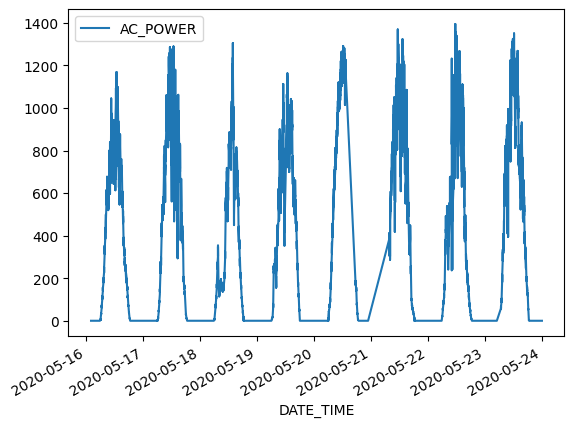

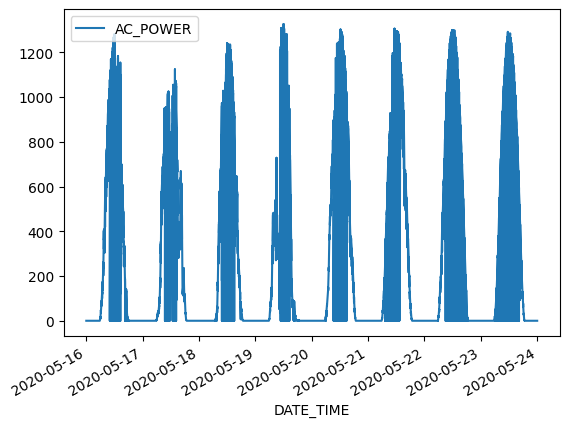

In [10]:
period_plant_1.plot(x="DATE_TIME", y="AC_POWER", kind="line")
period_plant_2.plot(x="DATE_TIME", y="AC_POWER", kind="line")

4. Na tym samym wykresie pokaż średnie AC_POWER dla wszystkich generatorów

<Figure size 640x480 with 0 Axes>

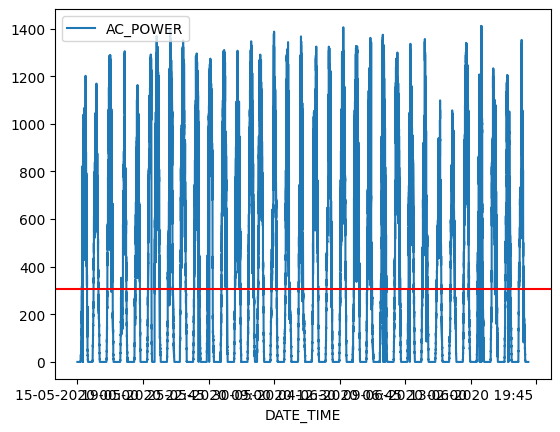

In [54]:
mean_ac_power = plant.groupby("PLANT_ID")["AC_POWER"].mean()

first_line = mean_ac_power[4135001]
second_line = mean_ac_power[4136001]

plt.clf()
plant_1.plot(x="DATE_TIME", y="AC_POWER", kind="line")
plt.axhline(y=first_line, color="red")
plt.show()

<Figure size 640x480 with 0 Axes>

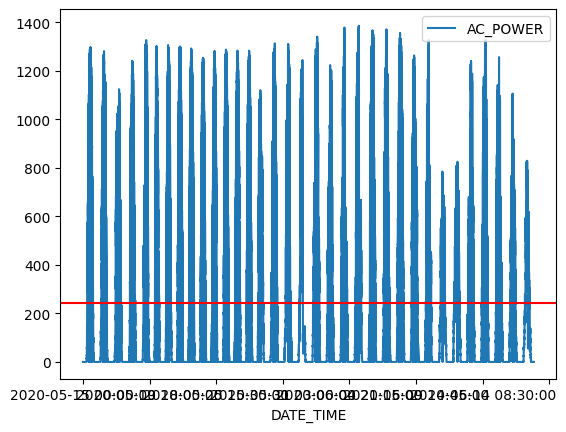

In [55]:
plt.clf()
plant_2.plot(x="DATE_TIME", y="AC_POWER", kind="line")
plt.axhline(y=second_line, color="red")
plt.show()

5. Znajdź przypadki, kiedy AC_POWER któregoś z generatorów było na poziomie < 80% średniej. Których generatorów najczęściej to dotyczy?

In [77]:
threshold_ac_power = 0.8
plant_filtred_1 = plant[plant["AC_POWER"] < threshold_ac_power * mean_ac_power[4135001]]
plant_filtred_2 = plant[plant["AC_POWER"] < threshold_ac_power * mean_ac_power[4136001]]
plant_filtred = pd.concat([plant_filtred_1, plant_filtred_2])

counts = plant_filtred.groupby("PLANT_ID")["AC_POWER"].count()
print(counts) 


PLANT_ID
4135001.0    81495
4136001.0    90555
Name: AC_POWER, dtype: int64
